In [1]:
!pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/0c/94/e4181a1f6286f545507528c78016e00065ea913276888db2262507693ce5/PyMySQL-1.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [6]:
import os
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import sqlite3


In [15]:
import pymysql

# Define database connection parameters
db_host = "127.0.0.1"  # Since MySQL is running locally
db_port = 3306  # Default MySQL port
db_user = "root"  # Change if using another username
db_password = "Ashmita@216"  # Your MySQL password
db_name = "autoconnect"  # Replace with your database name

# Establish the connection
conn = pymysql.connect(
    host=db_host,
    port=db_port,
    user=db_user,
    passwd=db_password,
    db=db_name
)

# Create a cursor object
cursor = conn.cursor()

# Execute a test query (list all tables)
cursor.execute("SHOW TABLES;")

# Fetch and print table names
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close connection when done


Tables in the database: (('Agent',), ('client_info',), ('Employee',), ('Insurance_Details',), ('SoldCars',), ('UsedCars',))


1) total no of cars sold per region

In [19]:
df2 = pd.read_sql_query( """
SELECT a.agent_id, a.agent_name, COUNT(s.car_id) AS cars_sold 
FROM Agent a
LEFT JOIN SoldCars s ON a.agent_id = s.agent_id
GROUP BY a.agent_id
""", conn)
df2

/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/1453594839.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query( """


,agent_id,agent_name,cars_sold
0,101,Alice Johnson,1
1,102,Charlie Davis,1
2,103,Emma Taylor,1
3,104,Grace Lee,1
4,105,Ivy Miller,1
5,106,Leo Davis,1
6,107,Mia Wilson,1
7,108,Noah Smith,1
8,109,Paul Brown,1
9,110,Ryan Martin,1


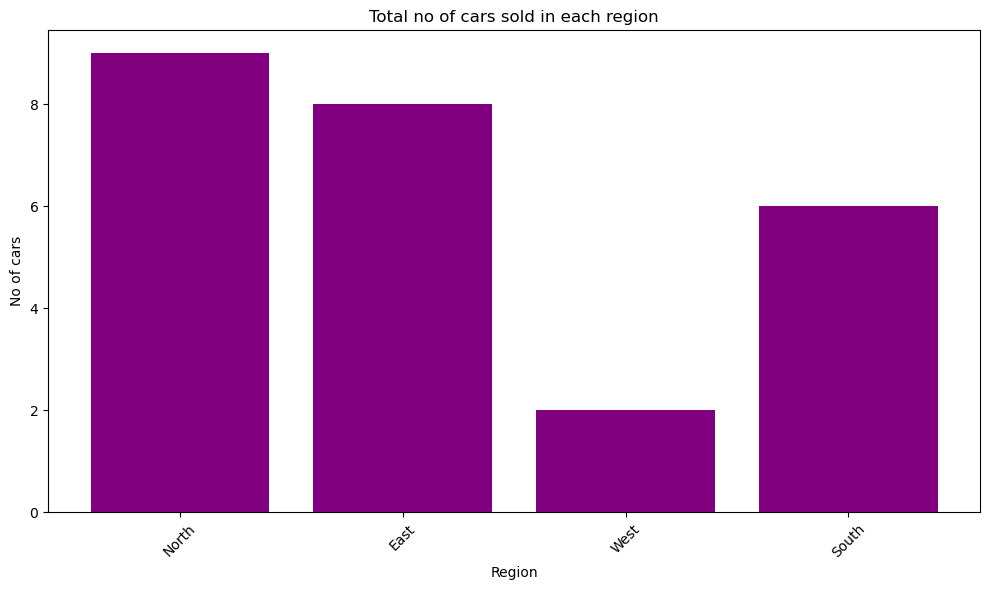

In [23]:
region = ['North', 'East', 'West', 'South'] 
car_sold= [9,8,2,6]
plt.figure(figsize=(10, 6))
plt.bar(region, car_sold, color='purple')
plt.title('Total no of cars sold in each region') 
plt.xlabel('Region')
plt.ylabel('No of cars')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

2) Youngest and oldest employee in each department

In [18]:
df3 = pd.read_sql_query("""
SELECT Department, MIN(DOB) AS youngest_employee, MAX(DOB) AS oldest_employee 
FROM Employee 
GROUP BY Department
""", conn)
df3

/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/845032661.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query("""


,Department,youngest_employee,oldest_employee
0,Sales,1980-05-15,1984-03-18
1,Finance,1977-06-25,1987-07-28
2,Marketing,1975-11-08,1985-03-10
3,IT,1978-12-18,1989-04-15
4,HR,1980-12-10,1990-08-20
5,Insurance,1978-04-30,1989-08-12


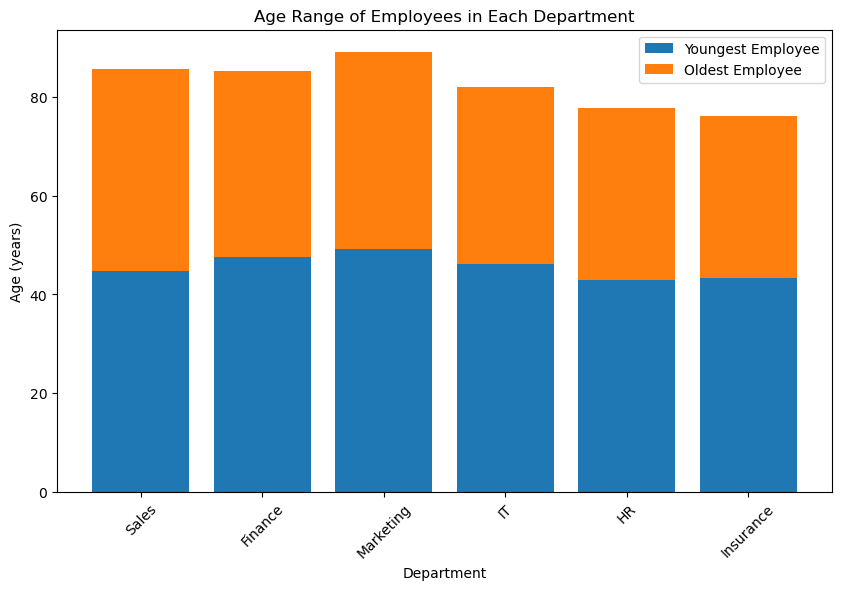

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Corrected data dictionary
data = {
    'Department': ['Sales', 'Finance', 'Marketing', 'IT', 'HR', 'Insurance'],
    'youngest_employee': ['1980-05-15', '1977-06-25', '1975-11-08', '1978-12-18', '1982-04-22', '1981-09-14'],
    'oldest_employee': ['1984-03-18', '1987-07-28', '1985-03-10', '1989-04-15', '1990-02-11', '1992-06-20']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert date strings to datetime objects
df['youngest_employee'] = pd.to_datetime(df['youngest_employee'])
df['oldest_employee'] = pd.to_datetime(df['oldest_employee'])

# Get current date
now = datetime.now()

# Calculate ages
df['youngest_age'] = (now - df['youngest_employee']).dt.days / 365.25
df['oldest_age'] = (now - df['oldest_employee']).dt.days / 365.25

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Department'], df['youngest_age'], label='Youngest Employee')
plt.bar(df['Department'], df['oldest_age'], bottom=df['youngest_age'], label='Oldest Employee')

# Labels and Title
plt.xlabel('Department')
plt.ylabel('Age (years)')
plt.title('Age Range of Employees in Each Department')
plt.legend()
plt.xticks(rotation=45)  # Rotate department names for better readability

# Show plot
plt.show()


The graph shows the average age range of employees in each department. The average age range of employees in the sales, finance, marketing, IT, and insurance departments is between 30 and 40 years old. The average age range of employees in the HR department is between 40 and 50 years old.
Some possible insights from this graph include:
a) The sales, finance, marketing, IT, and insurance departments may have a more dynamic and fast-paced work environment, which may attract younger employees. b) The HR
department may have a more stable and structured work environment, which may attract more experienced employees. c) The company may have a good mix of employees of different ages, which can bring a variety of perspectives and experiences to the workplace. d) The company may want to consider implementing programs and initiatives to support employees of all ages, such as mentoring programs, wellness programs, and flexible work arrangements.


3) Find clients who have purchased a car and their insurance details: 

In [34]:
df5 = pd.read_sql_query("""
SELECT c.client_id, s.buyer,i.policy_number, i.coverage
FROM client_info c
JOIN SoldCars s ON c.client_id = s.client_id
JOIN insurance_details i ON s.car_id = i.car_id;
""", conn)
df5


/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/4181510723.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql_query("""


,client_id,buyer,policy_number,coverage
0,1,John Doe,1001,Comprehensive
1,2,Jane Smith,1002,Third Party
2,3,George Brown,1003,Comprehensive
3,4,Linda White,1004,Third Party
4,5,Michael Green,1005,Comprehensive
5,6,Sarah Harris,1006,Third Party
6,7,Emily Lee,1007,Comprehensive
7,8,David Clark,1008,Third Party
8,9,Oliver Davis,1009,Comprehensive
9,10,Sophia Taylor,1010,Third Party


 Client Preferences and Their Sold Cars Details

In [36]:
df6 = pd.read_sql_query("""
SELECT c.client_name, c.preference_type, u.model AS car_model, u.type AS car_type, s.sell_price, i.coverage AS insurance_coverage
FROM client_info c
JOIN SoldCars s ON c.client_id = s.client_id
JOIN UsedCars u ON s.car_id = u.car_id
JOIN Insurance_Details i ON s.car_id = i.car_id
WHERE c.preference_type = 'Premium'
ORDER BY c.client_name;
""", conn)
df6

/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/327427058.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql_query("""


,client_name,preference_type,car_model,car_type,sell_price,insurance_coverage
0,Ella Harris,Premium,Chevrolet Silverado,Truck,28000.0,Comprehensive
1,Emily Davis,Premium,Chevrolet Malibu,Sedan,21000.0,Third Party
2,Ethan Scott,Premium,Kia Sportage,SUV,23500.0,Comprehensive
3,John Doe,Premium,Toyota Camry,Sedan,14500.0,Comprehensive
4,Liam Robinson,Premium,Jeep Wrangler,Convertible,29000.0,Third Party
5,Madeline Clark,Premium,Nissan Rogue,SUV,27000.0,Third Party
6,Sophia Martinez,Premium,Honda CR-V,SUV,22500.0,Comprehensive


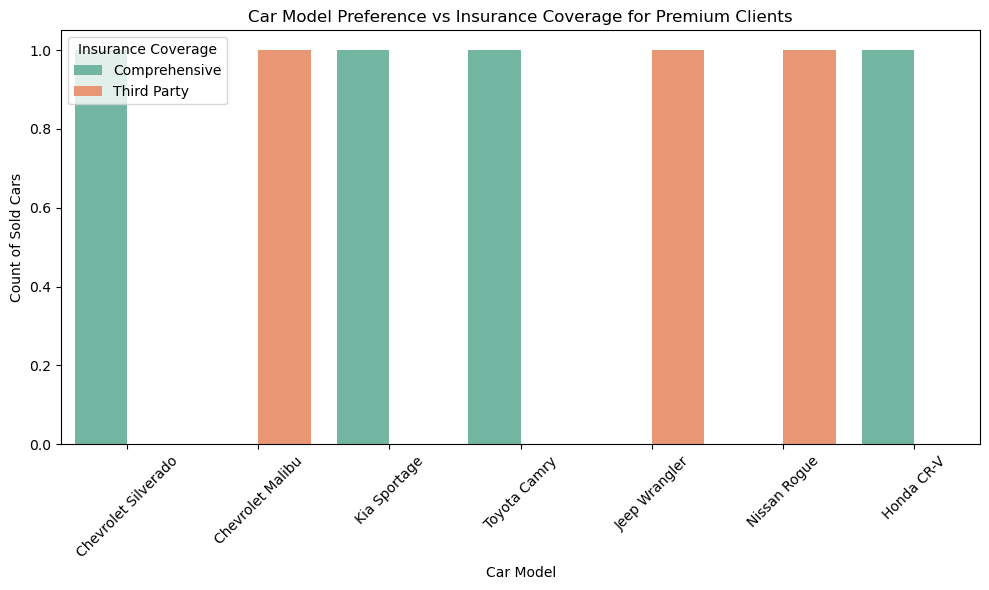

In [38]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_client_preferences, x='car_model', hue='insurance_coverage', palette='Set2')
plt.title('Car Model Preference vs Insurance Coverage for Premium Clients')
plt.xlabel('Car Model')
plt.ylabel('Count of Sold Cars')
plt.xticks(rotation=45)
plt.legend(title='Insurance Coverage')
plt.tight_layout()
plt.show()

 Sales Performance of Agents in Different Regions


In [39]:
df7 = pd.read_sql_query("""
SELECT a.agent_name, a.region, COUNT(s.sale_id) AS total_sales, SUM(s.sell_price) AS total_sales_amount
FROM SoldCars s
JOIN Agent a ON s.agent_id = a.agent_id
GROUP BY a.agent_name, a.region
ORDER BY total_sales_amount DESC;
""", conn)
df7

/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/1810649479.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql_query("""


,agent_name,region,total_sales,total_sales_amount
0,Xavier Brown,South,1,33000.0
1,Yvonne Taylor,North,1,32000.0
2,Ursula Harris,North,1,31500.0
3,Tom Johnson,South,1,29500.0
4,Zachary White,East,1,29000.0
5,Wendy Smith,East,1,28000.0
6,Ryan Martin,West,1,27000.0
7,Daniel Wilson,South,1,25500.0
8,Paul Brown,South,1,25000.0
9,Ivy Miller,North,1,24000.0


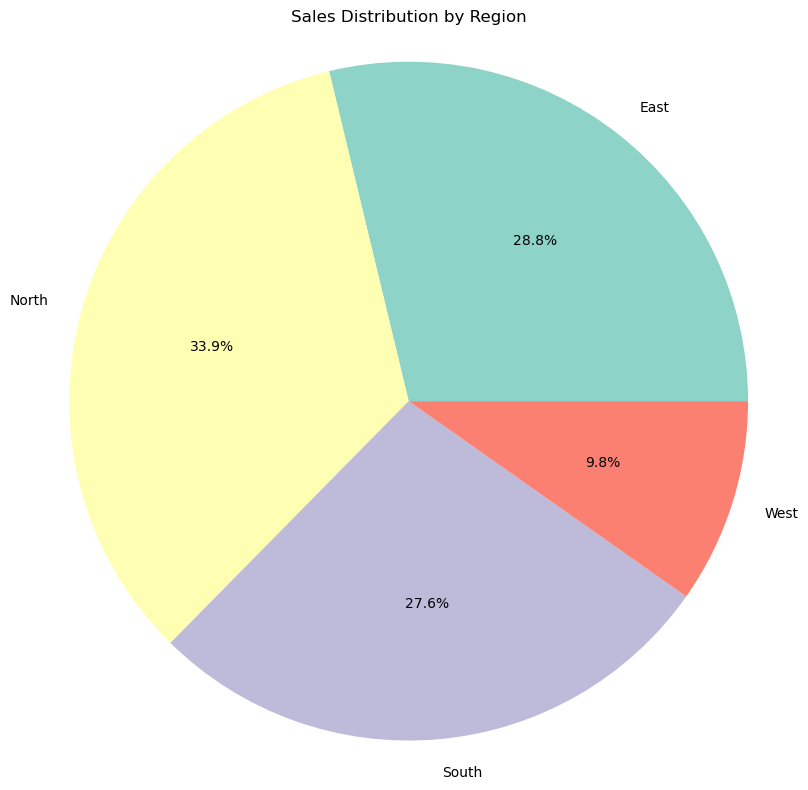

In [42]:
# Sales Performance by Region (Pie Chart)
sales_by_region = df7.groupby('region')['total_sales_amount'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['total_sales_amount'], labels=sales_by_region['region'], autopct='%1.1f%%', colors=sns.color_palette("Set3", len(sales_by_region)))
plt.title('Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Insurance Premiums vs Car Prices

In [43]:
df8 = pd.read_sql_query("""
SELECT i.coverage AS insurance_coverage, AVG(i.premium) AS avg_premium, AVG(s.sell_price) AS avg_car_price
FROM Insurance_Details i
JOIN SoldCars s ON i.car_id = s.car_id
GROUP BY i.coverage
ORDER BY avg_car_price DESC;
""", conn)
df8

/var/folders/w_/s7xh_4rx0nx482cx1y8ts_bh0000gn/T/ipykernel_85496/891624774.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql_query("""


,insurance_coverage,avg_premium,avg_car_price
0,Third Party,321.0,24500.0
1,Comprehensive,553.0,23650.0


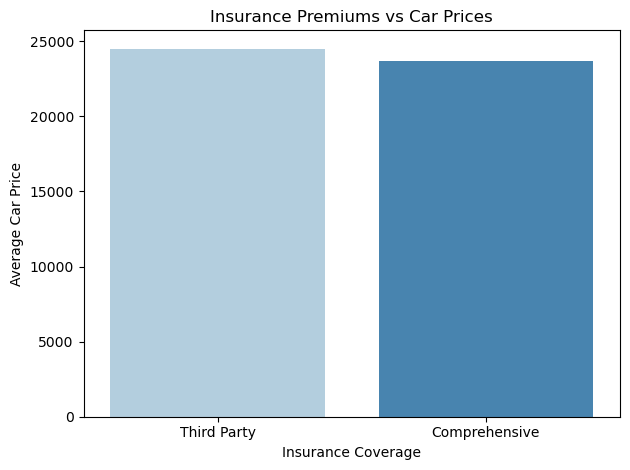

In [52]:
#plt.figure(figsize=(10, 6))
sns.barplot(data=df8, x='insurance_coverage', y='avg_car_price', palette='Blues')
plt.title('Insurance Premiums vs Car Prices')
plt.xlabel('Insurance Coverage')
plt.ylabel('Average Car Price')
plt.tight_layout()
plt.show()